In [1]:
ls

Bc_epitopes_HLA_overlap-05-06-20.txt
'Extract minimal epitope predictions.ipynb'
Frequency_table_27mer.csv
Frequency_table_27mer_all_ethnic_groups.csv
HLA_freq_formated.txt
HLA_freq_formatted.csv
'Select vaccine peptides.ipynb'
'Summarize Vaccine Peptides.ipynb'
Table_S5_final_vaccine-peptides-merged.csv
Window_15mer_all_proteins.txt
Window_21mer_all_proteins.txt
Window_27mer_all_proteins.txt
final-vaccine-peptides-15mer.csv
final-vaccine-peptides-15mer.fa
final-vaccine-peptides-15mer.html
final-vaccine-peptides-15mer.log
final-vaccine-peptides-15mer.tex
final-vaccine-peptides-21mer.csv
final-vaccine-peptides-21mer.fa
final-vaccine-peptides-21mer.html
final-vaccine-peptides-21mer.tex
final-vaccine-peptides-27mer.csv
final-vaccine-peptides-27mer.fa
final-vaccine-peptides-27mer.html
final-vaccine-peptides-27mer.tex
final-vaccine-peptides-h2b-15mer.csv
final-vaccine-peptides-h2b-15mer.fa
final-vaccine-peptides-h2b-15mer.html
final-vaccine-peptides-h2b-15mer.tex
final-vaccine-peptides-h2b-

In [3]:
!head Window_15mer_all_proteins.txt

Sequence,Protein,Start,End,HLA-I_peptides,HLA-I_haplotypes,HLA-I_pop_freq,HLA-II_peptides,HLA-II_haplotypes,HLA-II_pop_freq,Mouse MHC-I b,Mouse MHC-I d,Mouse MHC-II b,Mouse MHC-II d,Total_frequency
MESLVPGFNEKTHVQ,orf1ab,1,15,"ESLVPGFNEK,SLVPGFNEK","HLA-A*11:01,HLA-A*03:01",0.299196077180553,"","",0,"","","","",0
ESLVPGFNEKTHVQL,orf1ab,2,16,"ESLVPGFNEK,SLVPGFNEK","HLA-A*11:01,HLA-A*03:01",0.299196077180553,"","",0,"","","","",0
SLVPGFNEKTHVQLS,orf1ab,3,17,SLVPGFNEK,"HLA-A*03:01,HLA-A*11:01",0.299196077180553,"","",0,"","","","",0
LVPGFNEKTHVQLSL,orf1ab,4,18,"","",0,"","",0,"","","","",0
VPGFNEKTHVQLSLP,orf1ab,5,19,"","",0,"","",0,"","","","",0
PGFNEKTHVQLSLPV,orf1ab,6,20,"","",0,"","",0,"","","","",0
GFNEKTHVQLSLPVL,orf1ab,7,21,HVQLSLPVL,HLA-C*03:04,0.143681590569932,"","",0,"","","","",0
FNEKTHVQLSLPVLQ,orf1ab,8,22,HVQLSLPVL,HLA-C*03:04,0.143681590569932,"","",0,"","","","",0
NEKTHVQLSLPVLQV,orf1ab,9,23,"HVQLSLPVL,QLSLPVLQV,VQLSLPVLQV","HLA-C*03:04,HLA-A*02:01",0.501188874694642,"",""

In [4]:
df_15mer = pd.read_csv("Window_15mer_all_proteins.txt")
df_21mer = pd.read_csv("Window_21mer_all_proteins.txt")
df_27mer = pd.read_csv("Window_27mer_all_proteins.txt")


In [19]:
df_15mer.head()

,Sequence,Protein,Start,End,HLA-I_peptides,HLA-I_haplotypes,HLA-I_pop_freq,HLA-II_peptides,HLA-II_haplotypes,HLA-II_pop_freq,Mouse MHC-I b,Mouse MHC-I d,Mouse MHC-II b,Mouse MHC-II d,Total_frequency
0,MESLVPGFNEKTHVQ,orf1ab,1,15,"ESLVPGFNEK,SLVPGFNEK","HLA-A*11:01,HLA-A*03:01",0.299196,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0
1,ESLVPGFNEKTHVQL,orf1ab,2,16,"ESLVPGFNEK,SLVPGFNEK","HLA-A*11:01,HLA-A*03:01",0.299196,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0
2,SLVPGFNEKTHVQLS,orf1ab,3,17,SLVPGFNEK,"HLA-A*03:01,HLA-A*11:01",0.299196,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0
3,LVPGFNEKTHVQLSL,orf1ab,4,18,NaN,NaN,0.000000,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0
4,VPGFNEKTHVQLSLP,orf1ab,5,19,NaN,NaN,0.000000,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0


In [13]:
extremely_unstable_dipeptides_unc = {
  "DG",
  "NG",
}
problematic_dipeptides_unc = {
   "DS", 
   "DN", 
   "DD", 
   "NN", 
   "ND", 
   "NS",
}

problematic_dipeptides_jpt = {"NP"}

problematic_dipeptides = problematic_dipeptides_unc.union(problematic_dipeptides_jpt)

In [20]:
len(df_15mer)

9701

In [21]:
len(df_21mer)

9701

In [22]:
len(df_27mer)

9701

In [23]:
df_27mer.Sequence.str.len().describe()

count    9701.000000
mean       26.963818
std         0.798730
min         1.000000
25%        27.000000
50%        27.000000
75%        27.000000
max        27.000000
Name: Sequence, dtype: float64

In [26]:
# in case the tiling of sequences included all shorter sequences at the start/end of the whole proteome
# drop those sequences 
df_15mer = df_15mer[df_15mer.Sequence.str.len() == 15]
df_21mer = df_21mer[df_21mer.Sequence.str.len() == 21]
df_27mer = df_27mer[df_27mer.Sequence.str.len() == 27]
print(len(df_15mer), len(df_21mer), len(df_27mer))

9687 9681 9675


In [27]:
hydropathy_dict = {
    "A": 1.8,
    "C": 2.5,
    "D": -3.5,
    "E": -3.5,
    "F": 2.8,
    "G": -0.4,
    "H": -3.2,
    "I": 4.5,
    "K": -3.9,
    "L": 3.8,
    "M": 1.9,
    "N": -3.5,
    "P": -1.6,
    "Q": -3.5,
    "R": -4.5,
    "S": -0.8,
    "T": -0.7,
    "V": 4.2,
    "W": -0.9,
    "Y": -1.3
}

In [28]:

def gravy_score(amino_acids):
    """
    Mean amino acid hydropathy averaged across residues of a peptide
    or protein sequence.
    """
    total = 0 
    for aa in amino_acids:
        total += hydropathy_dict[aa]
    return total / len(amino_acids)


In [29]:

def max_kmer_gravy_score(amino_acids, k):
    """
    Returns max GRAVY score of any kmer in the amino acid sequence,
    used to determine if there are any extremely hydrophobic regions within a
    longer amino acid sequence.
    """
    return max(
        gravy_score(amino_acids[i:i + k])
        for i in range(len(amino_acids) - k + 1))


In [30]:
def max_short_subsequence_gravy_score(amino_acids):
    gravy_scores = [
        max_kmer_gravy_score(amino_acids, k)
        for k in [5, 6, 7, 8]
    ]
    return max(gravy_scores)


In [31]:


def difficult_c_terminal(amino_acids):
    return amino_acids[-1] in {"P", "C", "H"}

def difficult_n_terminal(amino_acids):
    """
    Is the N-terminus one of {Gln, Glu, Cys}?
    ---
    Priority I: avoid N-terminal Gln, Glu, Cys
    Priority II: Asparagine at the N-terminus of a peptide is also hard
    to synthesize, though not as bad as {Gln, Glu, Cys}
    """
    return amino_acids[0] in {"Q", "E", "C", "N"}


def cysteine_count(amino_acids):
    """
    How many cysteines are in the amino acid sequence?
    Problem with cysteine residues: They can form disulfide bonds across
    distant parts of the peptide
    """
    return amino_acids.count("C")

def methionine_count(amino_acids):
    """
    How many methionies?
    """
    return amino_acids.count("M")

def thiol_count(amino_acids):
    return cysteine_count(amino_acids) + methionine_count(amino_acids)

def num_extremely_unstable_dipeptides(amino_acids):
    total = 0
    for dipeptide in extremely_unstable_dipeptides_unc:
        total += amino_acids.count(dipeptide)
    return total
    extremely_unstable_dipeptides_unc

def num_moderately_unstable_dipeptides(amino_acids):
    total = 0
    for dipeptide in problematic_dipeptides_unc.union(problematic_dipeptides_jpt):
        total += amino_acids.count(dipeptide)
    return total

In [32]:
def annotate_manufacturability(df):
    df = df.copy()
    df["num_extremely_unstable_dipeptides"] = df.Sequence.map(num_extremely_unstable_dipeptides)
    df["num_moderately_unstable_dipeptides"] = df.Sequence.map(num_moderately_unstable_dipeptides)
    df["num_cysteines"] = df.Sequence.map(cysteine_count)
    df["num_methionines"] = df.Sequence.map(methionine_count)
    df["num_thiols"] = df.Sequence.map(thiol_count)
    df["difficult_c_terminal"] = df.Sequence.map(difficult_c_terminal)
    df["difficult_n_terminal"] = df.Sequence.map(difficult_n_terminal)
    df["gravy"] = df.Sequence.map(gravy_score)
    df["max_kmer_gravy"] = df.Sequence.map(max_short_subsequence_gravy_score)
    df["extreme_local_hydrophobicity"] = df.max_kmer_gravy > 2.5
    df["difficult_local_hydrophobicity"] = df.max_kmer_gravy > 1.5
    df["too_many_cysteines"] = df.num_cysteines > 1
    df["manufacturability_difficulty_score"] = (
        1.0  * (df.gravy > 2.0) +        # hydrophobicity of whole peptide
        1.0 * df.difficult_n_terminal +  # lowest priority: N-terminal residues
        2.0 * df.difficult_c_terminal + 
        2.0 * df.num_thiols + 
        2.0 * df.difficult_local_hydrophobicity + 
        3.0 * df.num_moderately_unstable_dipeptides + 
        5.0 * df.too_many_cysteines +          # disulfide bonds
        10.0 * df.extreme_local_hydrophobicity + 
        10.0 * df.num_extremely_unstable_dipeptides 
    )
    return df

df_27mer_annot = annotate_manufacturability(df_27mer);
df_27mer_annot.to_csv("vaccine-peptides-27mer-annotated.csv", index=False)
df_21mer_annot = annotate_manufacturability(df_21mer);
df_21mer_annot.to_csv("vaccine-peptides-21mer-annotated.csv", index=False)
df_15mer_annot = annotate_manufacturability(df_15mer)
df_15mer_annot.to_csv("vaccine-peptides-15mer-annotated.csv", index=False)




In [33]:
df_concat = pd.concat([
    df_15mer_annot,
    df_21mer_annot,
    df_27mer_annot,
])
df_concat["Length"] = df_concat.Sequence.str.len()

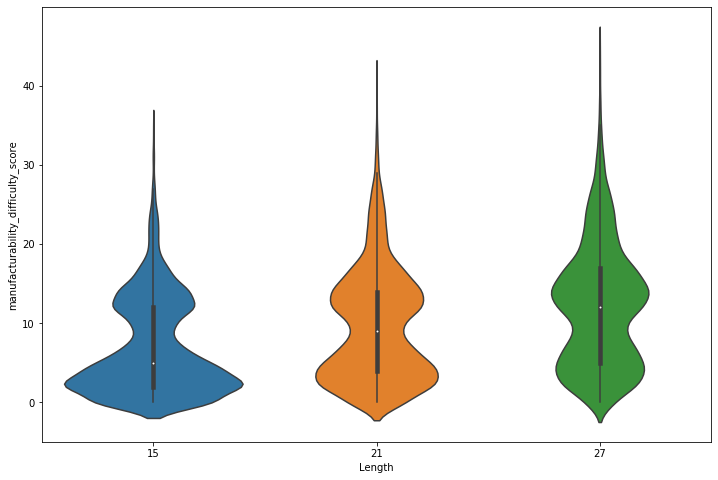

In [34]:
import seaborn 
import matplotlib 
from matplotlib import pyplot
fig = pyplot.figure(figsize=(12,8))

seaborn.violinplot(data=df_concat, x="Length", y="manufacturability_difficulty_score")

fig.savefig("manufacturability-violin-plot.png")

In [35]:
bcell_epitopes = pd.read_csv("../bcell/accessible-linear-bcell-epitopes-grouped-merged-filtered.csv", index_col=0)

In [36]:
bcell_epitopes

,num_sources,sources,accessible_subsequence_start,accessible_subsequence_end,accessible_subsequence,accessible_subsequence_length,accessible_subsequence_is_4mer_or_longer,IgG,IgA,IgG_and_IgA,accessible_subsequence_contains_polymorphism,accessible_subsequence_contains_glycosite,near_any_feature,in_any_feature
5,3,Charite 2020 S459-473; Wang 2020 S456-460; Dah...,456,473,FRKSNLKPFERDISTEIY,18,True,True,True,True,False,False,True,True
7,5,Charite 2020 S569-583; Charite 2020 S571-585; ...,580,583,QTLE,4,True,True,True,True,False,False,True,False
11,7,Poh 2020 S809-826; Wang 2020 S806-820; Charite...,809,812,PSKP,4,True,True,True,True,False,False,True,False


In [37]:

from collections import OrderedDict

def annotate_overlapping_bcell_epitopes(df, bcell_epitopes, verbose=False):
    cols = OrderedDict([
        ("overlapping_bcell_epitope", []),
        ("overlapping_bcell_epitope_start", []),
        ("overlapping_bcell_epitope_end", []),
        ("overlapping_bcell_epitope_length", []),
        ("fraction_of_full_bcell_epitope", []),
        ("full_bcell_epitope", []),
        ("bcell_epitope_distance_from_edge", []),
        ("bcell_epitope_more_than_1aa_from_edge", []),
    ])

    for (prot, start, end) in zip(df_concat.Protein, df_concat.Start, df_concat.End):
        found_bcell_epitope = False
        if prot == "S":
            for (epitope, epitope_start, epitope_end) in zip(
                    bcell_epitopes.accessible_subsequence,
                    bcell_epitopes.accessible_subsequence_start,
                    bcell_epitopes.accessible_subsequence_end):
                if end >= epitope_start and start <= epitope_end:
                    found_bcell_epitope = True
                    overlap_start = max(epitope_start, start)
                    overlap_end = min(epitope_end, end)
                    overlap_length = overlap_end - overlap_start + 1
                    overlapping_bcell_epitope = epitope[
                        overlap_start - epitope_start:
                        overlap_end - epitope_start + 1]
                    overlap_percent_of_full_bcell_epitope = overlap_length / len(epitope)

                    cols["overlapping_bcell_epitope"].append(overlapping_bcell_epitope)
                    cols["overlapping_bcell_epitope_start"].append(overlap_start)
                    cols["overlapping_bcell_epitope_end"].append(overlap_end)
                    cols["overlapping_bcell_epitope_length"].append(overlap_length)
                    cols["fraction_of_full_bcell_epitope"].append(overlap_percent_of_full_bcell_epitope)
                    cols["full_bcell_epitope"].append(epitope)
                    distance_from_start = overlap_start - epitope_start
                    distance_from_end = epitope_end - overlap_end
                    distance_from_edge = min(distance_from_start, distance_from_end)
                    cols["bcell_epitope_distance_from_edge"].append(distance_from_edge)
                    cols["bcell_epitope_more_than_1aa_from_edge"].append(distance_from_edge > 1)
                    break
        if not found_bcell_epitope:
            cols["overlapping_bcell_epitope"].append(None)
            cols["overlapping_bcell_epitope_start"].append(None)
            cols["overlapping_bcell_epitope_end"].append(None)
            cols["overlapping_bcell_epitope_length"].append(0)
            cols["fraction_of_full_bcell_epitope"].append(0.0)
            cols["full_bcell_epitope"].append(None)
            cols["bcell_epitope_distance_from_edge"].append(None)
            cols["bcell_epitope_more_than_1aa_from_edge"].append(True)
        
    df_with_bcell_epitopes = df.copy()
    for (col_name, col_values) in cols.items():
        df_with_bcell_epitopes[col_name] = col_values
        if verbose:
            print("%s\n" % (df_with_bcell_epitopes[col_name].describe(),))
    return df_with_bcell_epitopes

df_with_bcell_epitopes = annotate_overlapping_bcell_epitopes(df_concat, bcell_epitopes, verbose=True);
df_with_bcell_epitopes

count      258
unique      50
top       QTLE
freq        54
Name: overlapping_bcell_epitope, dtype: object

count    258.000000
mean     591.034884
std      144.914448
min      456.000000
25%      457.000000
50%      580.000000
75%      809.000000
max      812.000000
Name: overlapping_bcell_epitope_start, dtype: float64

count    258.000000
mean     596.383721
std      142.341632
min      456.000000
25%      473.000000
50%      583.000000
75%      811.000000
max      812.000000
Name: overlapping_bcell_epitope_end, dtype: float64

count    29043.000000
mean         0.056399
std          0.751685
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         18.000000
Name: overlapping_bcell_epitope_length, dtype: float64

count    29043.000000
mean         0.006508
std          0.074768
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: fraction_of_full_bcell_epitope, dtype: float64

co

,Sequence,Protein,Start,End,HLA-I_peptides,HLA-I_haplotypes,HLA-I_pop_freq,HLA-II_peptides,HLA-II_haplotypes,HLA-II_pop_freq,...,manufacturability_difficulty_score,Length,overlapping_bcell_epitope,overlapping_bcell_epitope_start,overlapping_bcell_epitope_end,overlapping_bcell_epitope_length,fraction_of_full_bcell_epitope,full_bcell_epitope,bcell_epitope_distance_from_edge,bcell_epitope_more_than_1aa_from_edge
0,MESLVPGFNEKTHVQ,orf1ab,1,15,"ESLVPGFNEK,SLVPGFNEK","HLA-A*11:01,HLA-A*03:01",0.299196,NaN,NaN,0.000000,...,4.0,15,None,NaN,NaN,0,0.0,None,NaN,True
1,ESLVPGFNEKTHVQL,orf1ab,2,16,"ESLVPGFNEK,SLVPGFNEK","HLA-A*11:01,HLA-A*03:01",0.299196,NaN,NaN,0.000000,...,3.0,15,None,NaN,NaN,0,0.0,None,NaN,True
2,SLVPGFNEKTHVQLS,orf1ab,3,17,SLVPGFNEK,"HLA-A*03:01,HLA-A*11:01",0.299196,NaN,NaN,0.000000,...,2.0,15,None,NaN,NaN,0,0.0,None,NaN,True
3,LVPGFNEKTHVQLSL,orf1ab,4,18,NaN,NaN,0.000000,NaN,NaN,0.000000,...,2.0,15,None,NaN,NaN,0,0.0,None,NaN,True
4,VPGFNEKTHVQLSLP,orf1ab,5,19,NaN,NaN,0.000000,NaN,NaN,0.000000,...,2.0,15,None,NaN,NaN,0,0.0,None,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9670,AFPFTIYSLLLCRMNSRNYIAQVDVVN,ORF10,952,978,"AFPFTIYSL,CRMNSRNYI,FPFTIYSL,FPFTIYSLL","HLA-A*24:02,HLA-C*06:02,HLA-B*07:02,HLA-B*08:0...",0.648355,"IYSLLLCRMNSRNYI,LLLCRMNSRNYIAQV,SLLLCRMNSRNYIA...",HLA-DRB1*13:01,0.106080,...,19.0,27,None,NaN,NaN,0,0.0,None,NaN,True
9671,FPFTIYSLLLCRMNSRNYIAQVDVVNF,ORF10,953,979,"CRMNSRNYI,FPFTIYSL,FPFTIYSLL,NYIAQVDVVNF,YIAQV...","HLA-C*06:02,HLA-B*07:02,HLA-B*08:01,HLA-B*35:0...",0.648355,"IYSLLLCRMNSRNYI,LLLCRMNSRNYIAQV,MNSRNYIAQVDVVN...","HLA-DRB1*13:01,HLA-DRB1*01:01,HLA-DRB1*04:01",0.315083,...,19.0,27,None,NaN,NaN,0,0.0,None,NaN,True
9672,PFTIYSLLLCRMNSRNYIAQVDVVNFN,ORF10,954,980,"CRMNSRNYI,NYIAQVDVVNF,YIAQVDVVNF","HLA-C*06:02,HLA-A*24:02,HLA-B*35:01",0.379828,"IYSLLLCRMNSRNYI,LLLCRMNSRNYIAQV,MNSRNYIAQVDVVN...","HLA-DRB1*13:01,HLA-DRB1*01:01,HLA-DRB1*04:01",0.315083,...,19.0,27,None,NaN,NaN,0,0.0,None,NaN,True
9673,FTIYSLLLCRMNSRNYIAQVDVVNFNL,ORF10,955,981,"AQVDVVNFNL,CRMNSRNYI,NYIAQVDVVNF,YIAQVDVVNF","HLA-A*02:01,HLA-C*06:02,HLA-A*24:02,HLA-B*35:01",0.638745,"IYSLLLCRMNSRNYI,LLLCRMNSRNYIAQV,MNSRNYIAQVDVVN...","HLA-DRB1*13:01,HLA-DRB1*01:01,HLA-DRB1*04:01",0.315083,...,19.0,27,None,NaN,NaN,0,0.0,None,NaN,True


In [38]:
print(df_concat.columns)

Index(['Sequence', 'Protein', 'Start', 'End', 'HLA-I_peptides',
       'HLA-I_haplotypes', 'HLA-I_pop_freq', 'HLA-II_peptides',
       'HLA-II_haplotypes', 'HLA-II_pop_freq', 'Mouse MHC-I b',
       'Mouse MHC-I d', 'Mouse MHC-II b', 'Mouse MHC-II d', 'Total_frequency',
       'num_extremely_unstable_dipeptides',
       'num_moderately_unstable_dipeptides', 'num_cysteines',
       'num_methionines', 'num_thiols', 'difficult_c_terminal',
       'difficult_n_terminal', 'gravy', 'max_kmer_gravy',
       'extreme_local_hydrophobicity', 'difficult_local_hydrophobicity',
       'too_many_cysteines', 'manufacturability_difficulty_score', 'Length'],
      dtype='object')


In [39]:
df_accessibility = pd.read_csv("../solvent-accessibility/Woods-Glycans-MD-Site-Specific-Accessibility.csv");
df_accessibility

,Residue Proper Numbering,SiteSpecific Accessiblity,Nude Accessibility,Difference
0,27,0.94,0.99,0.05
1,28,0.99,1.00,0.01
2,29,0.15,0.26,0.11
3,30,0.36,0.76,0.40
4,31,0.00,0.00,0.00
...,...,...,...,...
1115,1142,0.78,0.89,0.11
1116,1143,0.66,0.70,0.04
1117,1144,0.78,0.79,0.01
1118,1145,0.85,0.86,0.00


In [40]:

def num_contiguous_accessible_residues(protein, start, end, aa_num_to_accessibility, cutoff=0.2):
    if protein != "S":
        return 0
    kmers = []
    curr_kmer = 0
    for aa_num in range(start, end + 1):
        accessibility = aa_num_to_accessibility.get(aa_num, 0)
        if accessibility >= cutoff:
            curr_kmer += 1
        elif curr_kmer > 0:
            kmers.append(curr_kmer)
            curr_kmer = 0
    if curr_kmer > 0:
        kmers.append(curr_kmer)
    if len(kmers) == 0:
        return 0
    else:
        return max(kmers)

def annotate_accesibility(df, cutoff=0.2):
    df = df.copy()
    df_accessibility = pd.read_csv("../solvent-accessibility/Woods-Glycans-MD-Site-Specific-Accessibility.csv");
    aa_num_to_accessibility = dict(
        zip(df_accessibility["Residue Proper Numbering"],
            df_accessibility["SiteSpecific Accessiblity"]))
    accessibility_table_start = min(aa_num_to_accessibility.keys())
    accessibility_table_end = max(aa_num_to_accessibility.keys())
    transmembrane_start = 1208
    
    df["in_or_after_spike_transmembrane"] = [
        (p == "S" and s >= transmembrane_start)
        for (p, s) in zip(df.Protein, df.Start)
    ]
    df["in_spike"] = [p == "S" for p in df.Protein]
    df["not_in_spike"] = ~df.in_spike
    df["in_spike_accessibility_table"] = [
        (p == "S" and s >= accessibility_table_start and e <= accessibility_table_end)
        for (p, s, e) in zip(df.Protein, df.Start, df.End)
    ]
    
    df["longest_contiguous_accessible_region_in_spike"] = [
        num_contiguous_accessible_residues(p, s, e, aa_num_to_accessibility, cutoff=cutoff)
        for (p, s, e) in zip(df.Protein, df.Start, df.End)
    ]
    
    df["max_accessibility"] = [
        max([aa_num_to_accessibility.get(aa_num, 0) for aa_num in range(s, e + 1)])
        if p == "S"
        else 0
        for (p, s, e) in zip(df.Protein, df.Start, df.End)
    ]
    
    df["known_accessibility"] = (
        df.not_in_spike | 
        df.in_spike_accessibility_table | 
        df.in_or_after_spike_transmembrane
    )
    df["unknown_accessibility"] = ~df.known_accessibility
    df["num_unknown_accessibility"] = [
        0 if (p != "S" or s >= transmembrane_start) else max(
            max(0, accessibility_table_start - s),
            max(0, e - accessibility_table_end))
        for (p, s, e) in zip(df.Protein, df.Start, df.End)
    ]
    
    return df

def annotate_selection_criteria(df, rounding_decimals=2):
    df = df.copy()
    df["manufacturability_feasibility_score"] = 2.0 ** (
        -df.manufacturability_difficulty_score / 10.0)
    df["has mouse MHC-I b"] = ~df["Mouse MHC-I b"].isnull()
    df["has mouse MHC-II b"] = ~df["Mouse MHC-II b"].isnull()
    df["has mouse MHC-I d"] = ~df["Mouse MHC-I d"].isnull()
    df["has mouse MHC-II d"] = ~df["Mouse MHC-II d"].isnull()
    df["mouse H2-b count"] = (
        df["has mouse MHC-I b"].astype(int) + 
        df["has mouse MHC-II b"].astype(int) 
    )
    df["mouse H2-d count"] = (
        df["has mouse MHC-I d"].astype(int) + 
        df["has mouse MHC-II d"].astype(int) 
    )
    df["mouse class I count"] = (
        df["has mouse MHC-I b"].astype(int) + 
        df["has mouse MHC-I d"].astype(int) 
    )
    df["mouse class II count"] = (
        df["has mouse MHC-II b"].astype(int) + 
        df["has mouse MHC-II d"].astype(int) 
    )
    df["mouse count"] = df["mouse H2-b count"] + df["mouse H2-d count"]
    df["HLA-I_pop_freq_rounded"] = df["HLA-I_pop_freq"].round(rounding_decimals)
    df["HLA-II_pop_freq_rounded"] = df["HLA-II_pop_freq"].round(rounding_decimals)
    df["Total_frequency_rounded"] = df["Total_frequency"].round(rounding_decimals)
    df["manufacturability_feasibility_score_rounded"] = \
        df["manufacturability_feasibility_score"].round(rounding_decimals)

    return annotate_accesibility(df)




In [41]:

df_concat_annot = annotate_selection_criteria(df_concat);


In [42]:
df_concat_annot.known_accessibility[df_concat_annot.num_unknown_accessibility > 0].mean()

0.0

In [43]:
df_concat_annot[df_concat_annot.Protein == "S"].unknown_accessibility.mean()

0.0840534171249018

In [44]:
df_concat_annot_bcell = annotate_overlapping_bcell_epitopes(df_concat_annot, bcell_epitopes);
df_concat_annot_bcell.columns

Index(['Sequence', 'Protein', 'Start', 'End', 'HLA-I_peptides',
       'HLA-I_haplotypes', 'HLA-I_pop_freq', 'HLA-II_peptides',
       'HLA-II_haplotypes', 'HLA-II_pop_freq', 'Mouse MHC-I b',
       'Mouse MHC-I d', 'Mouse MHC-II b', 'Mouse MHC-II d', 'Total_frequency',
       'num_extremely_unstable_dipeptides',
       'num_moderately_unstable_dipeptides', 'num_cysteines',
       'num_methionines', 'num_thiols', 'difficult_c_terminal',
       'difficult_n_terminal', 'gravy', 'max_kmer_gravy',
       'extreme_local_hydrophobicity', 'difficult_local_hydrophobicity',
       'too_many_cysteines', 'manufacturability_difficulty_score', 'Length',
       'manufacturability_feasibility_score', 'has mouse MHC-I b',
       'has mouse MHC-II b', 'has mouse MHC-I d', 'has mouse MHC-II d',
       'mouse H2-b count', 'mouse H2-d count', 'mouse class I count',
       'mouse class II count', 'mouse count', 'HLA-I_pop_freq_rounded',
       'HLA-II_pop_freq_rounded', 'Total_frequency_rounded',
       'm

In [45]:
def parse_alleles(alleles):
    if type(alleles) in (list, set, tuple):
        alleles = set(alleles)
    elif type(alleles) is str:
        alleles = set(alleles.split(","))
    else:
        alleles = set()
    return alleles

    
def population_coverage(alleles, allele_frequencies):
    alleles = parse_alleles(alleles)

    if len(alleles) > 0:

        individual_allele_frequencies = np.array([allele_frequencies[a] for a in alleles])
        prob_not_allele_haploid = 1.0 - (individual_allele_frequencies / 100.0)
        prob_not_allele_diploid = prob_not_allele_haploid ** 2
        prob_missing_all = np.prod(prob_not_allele_diploid)
        prob_atleast_one = 1.0 - prob_missing_all

        return prob_atleast_one
    else:
        return 0.0 

def update_marginal_coverage(
        df, 
        allele_frequencies, 
        chosen_class1_alleles=[], 
        chosen_class2_alleles=[], 
        decimals=2,
        prefix="marginal_"):
    """
    Create or update columns named 'marginal_class1_coverage' & 'marginal_class2_coverage'
    by excluding a blacklist of class1 & class2 alleles which have already been 
    included in a partially constructed list of vaccine peptides.
    
    Expects allele_frequencies to be a dictionary with values between [0, 100]
    and will update DataFrame with values in the same range. 
    """
    # based on which class1 and class2 alleles we've already chosen
    # compute updated 
    df = df.copy()
    chosen_class1_alleles = set(chosen_class1_alleles)
    chosne_class2_alleles = set(chosen_class2_alleles)
    class1_coverages = []
    class2_coverages = []
    for class1_alleles, class2_alleles in zip(df['HLA-I_haplotypes'], df['HLA-II_haplotypes']):
        class1_alleles = parse_alleles(class1_alleles)
        class2_alleles = parse_alleles(class2_alleles)
        extra_class1_alleles = class1_alleles.difference(chosen_class1_alleles)
        extra_class2_alleles = class2_alleles.difference(chosen_class2_alleles)
        class1_coverages.append(population_coverage(extra_class1_alleles, allele_frequencies))
        class2_coverages.append(population_coverage(extra_class2_alleles, allele_frequencies))
    
    class1_key = "%sclass1_coverage" % prefix
    df[class1_key] = class1_coverages
    df[class1_key + "_rounded"] = df[class1_key].round(decimals)
    class2_key = "%sclass2_coverage" % prefix
    df[class2_key] = class2_coverages
    df[class2_key + "_rounded"] = df[class2_key].round(decimals)
    combined_key = "%scombined_coverage" % prefix
    df[combined_key] = np.array(class1_coverages) * np.array(class2_coverages)
    df[combined_key + "_rounded"] = df[combined_key].round(decimals)
    return df

In [46]:
df_freq = pd.read_csv("HLA_freq_formated.txt");
df_freq["Class"] = df_freq.Haplotype.map(lambda x: "II" if "D" in x else "I");
print(df_freq.groupby("Class")["Frequency"].sum())
print(df_freq.groupby("Class")["Frequency"].count())

allele_to_frequency = {a: f for (a, f) in zip(df_freq["Haplotype"], df_freq["Frequency"])}
unique_alleles_in_vaccine_peptides = set([])
for class1, class2 in zip(df_concat["HLA-I_haplotypes"], df_concat["HLA-II_haplotypes"]):
    if type(class1) is str:
        unique_alleles_in_vaccine_peptides.update(class1.split(","))
    if type(class2) is str:
        unique_alleles_in_vaccine_peptides.update(class2.split(","))
len(unique_alleles_in_vaccine_peptides), len(allele_to_frequency)
print("Alleles in frequency table, not in vaccine peptides:")
for a, f in allele_to_frequency.items():
    if a not in unique_alleles_in_vaccine_peptides:
        print("==> %s (%0.2f)" % (a, f))
print("Alleles in vaccine peptides, not in frequency table:")
for a in unique_alleles_in_vaccine_peptides:
    if a not in allele_to_frequency:
        print("==> %s" % a)

Class
I     164.655275
II    139.423328
Name: Frequency, dtype: float64
Class
I     17
II    15
Name: Frequency, dtype: int64
Alleles in frequency table, not in vaccine peptides:
==> HLA-DQA1*03:01/DQB1*03:02 (9.62)
==> HLA-DQA1*01:01/DQB1*05:01 (10.85)
==> HLA-DQA1*02:01/DQB1*02:02 (11.08)
==> HLA-B*15:01 (4.02)
Alleles in vaccine peptides, not in frequency table:


In [47]:

        
df_concat_with_marginal_freqs = update_marginal_coverage(
    df=df_concat,
    allele_frequencies=allele_to_frequency)
# sanity check that the population frequency calculation matches the one 
# that Christof annotated vaccine peptides with in the absence of any 
# "chosen" / excluded alleles.
print(
    "Should be near zero",
    (df_concat_with_marginal_freqs["HLA-I_pop_freq"] - df_concat_with_marginal_freqs["marginal_class1_coverage"]).abs().max(),
    (df_concat_with_marginal_freqs["HLA-II_pop_freq"] - df_concat_with_marginal_freqs["marginal_class2_coverage"]).abs().max()
)
df_concat_with_marginal_freqs_a0201 = update_marginal_coverage(
    df=df_concat,
    chosen_class1_alleles={"HLA-A*02:01"},
    allele_frequencies=allele_to_frequency)
# sanity check that the population frequency calculation matches the one 
# that Christof annotated vaccine peptides with in the absence of any 
# "chosen" / excluded alleles.
print(
    "Should be >0.4",
    (df_concat_with_marginal_freqs["HLA-I_pop_freq"] - df_concat_with_marginal_freqs_a0201["marginal_class1_coverage"]).abs().max(),
    (df_concat_with_marginal_freqs["HLA-II_pop_freq"] - df_concat_with_marginal_freqs_a0201["marginal_class2_coverage"]).abs().max()
)


Should be near zero 7.771561172376096e-16 6.661338147750939e-16
Should be >0.4 0.41749339987056 6.661338147750939e-16


In [48]:
df_with_bcell_epitopes.columns

Index(['Sequence', 'Protein', 'Start', 'End', 'HLA-I_peptides',
       'HLA-I_haplotypes', 'HLA-I_pop_freq', 'HLA-II_peptides',
       'HLA-II_haplotypes', 'HLA-II_pop_freq', 'Mouse MHC-I b',
       'Mouse MHC-I d', 'Mouse MHC-II b', 'Mouse MHC-II d', 'Total_frequency',
       'num_extremely_unstable_dipeptides',
       'num_moderately_unstable_dipeptides', 'num_cysteines',
       'num_methionines', 'num_thiols', 'difficult_c_terminal',
       'difficult_n_terminal', 'gravy', 'max_kmer_gravy',
       'extreme_local_hydrophobicity', 'difficult_local_hydrophobicity',
       'too_many_cysteines', 'manufacturability_difficulty_score', 'Length',
       'overlapping_bcell_epitope', 'overlapping_bcell_epitope_start',
       'overlapping_bcell_epitope_end', 'overlapping_bcell_epitope_length',
       'fraction_of_full_bcell_epitope', 'full_bcell_epitope',
       'bcell_epitope_distance_from_edge',
       'bcell_epitope_more_than_1aa_from_edge'],
      dtype='object')

In [49]:
len(df_concat)

29043

In [50]:
from collections import Counter

def choose_sort_columns(class1, class2, bcell): 
    class1_sort_columns = [
        "marginal_class1_coverage_rounded", 
        "HLA-I_pop_freq_rounded",
        "mouse class I count",
    ]
    class2_sort_columns = [
        "marginal_class2_coverage_rounded", 
        "HLA-II_pop_freq_rounded",
        "mouse class II count",
    ]
    
    if class1 and class2:
        primary_sort_columns = [
            "marginal_combined_coverage_rounded", 
            "Total_frequency_rounded",
            "mouse count",
        ]
        
        secondary_sort_columns = class1_sort_columns + class2_sort_columns
    elif class1:
        primary_sort_columns = class1_sort_columns
        secondary_sort_columns = class2_sort_columns
    elif class2:
        primary_sort_columns = class2_sort_columns
        secondary_sort_columns = class1_sort_columns
    else:
        primary_sort_columns = []
        secondary_sort_columns = []
        
    if bcell:
        primary_sort_columns = ["fraction_of_full_bcell_epitope", "bcell_epitope_more_than_1aa_from_edge"] + primary_sort_columns 
    
    tie_breakers = [
        "marginal_combined_coverage",
        "marginal_class1_coverage",
        "marginal_class2_coverage",
        "Total_frequency",
        "HLA-I_pop_freq",
        "HLA-II_pop_freq",
        "manufacturability_feasibility_score",
    ]
    if bcell:
        tie_breakers = ["bcell_epitope_distance_from_edge"] + tie_breakers 
        
    tie_breakers = tie_breakers + ["Start"]
    
    return (
        primary_sort_columns + 
        ["manufacturability_feasibility_score_rounded"] + 
        secondary_sort_columns + 
        tie_breakers
    )
    
    
def apply_filters(df, class1, class2, bcell, H2b, H2d, length, exclude_accessible_spike_regions, verbose):
    masks = []
    
    if H2b:
        if class1:
            H2b_class1 = df["has mouse MHC-I b"]
            if verbose:
                print("==> %d/%d peptides have class I H2b" % (H2b_class1.sum(), len(df)))
            masks.append(H2b_class1)
        if class2:
            H2b_class2 = df["has mouse MHC-II b"]
            if verbose:
                print("==> %d/%d peptides have class II H2b" % (H2b_class2.sum(), len(df)))
            masks.append(H2b_class2)
    if H2d:
        if class1:
            H2d_class1 = df["has mouse MHC-I d"]
            if verbose:
                print("==> %d/%d peptides have class I H2d" % (H2d_class1.sum(), len(df)))
            masks.append(H2d_class1)
        if class2:
            H2d_class2 = df["has mouse MHC-II d"]
            if verbose:
                print("==> %d/%d peptides have class II H2d" % (H2d_class2.sum(), len(df)))
            masks.append(H2d_class2)
            
    if length:
        length_mask = df.Sequence.str.len() == length
        if verbose:
            print("==> %d/%d peptides are %dmer" % (length_mask.sum(), len(df), length))
        masks.append(length_mask)
    
    if bcell:
        bcell_mask = df.overlapping_bcell_epitope_length >= 4
        if verbose:
            print("==> %d/%d peptides overlap B-cell epitopes" % (bcell_mask.sum(), len(bcell_mask)))
        masks.append(bcell_mask)
        
    if exclude_accessible_spike_regions:
        accessible_spike_mask = (
            ((df.longest_contiguous_accessible_region_in_spike + df.num_unknown_accessibility) > 3) |
            (df.max_accessibility > 0.6)
        )
        not_accessible_mask = ~accessible_spike_mask
        if verbose:
            print("%d/%d peptides do not contain accessible regions of the spike protein" % (
                not_accessible_mask.sum(),
                len(not_accessible_mask)))
        masks.append(not_accessible_mask)
        
    combined_mask = np.ones(len(df), dtype=bool)
    for m in masks:
        combined_mask = combined_mask & m.values
    df_subset = df[combined_mask]
    if verbose:
        print("==> Keeping %d/%d peptides" % (len(df_subset), len(df)))
    return df_subset

def select_vaccine_peptides(
        df, 
        length=None,
        class1=True,
        class2=True,
        H2b=True,
        H2d=True,
        bcell=False,
        bcell_epitopes=None,
        target_population_coverage=0.9,
        min_per_protein={"S": 1, "M": 1, "N": 1},
        max_kmer_overlap=8,
        verbose=False):
    
    df = annotate_selection_criteria(df)
    if bcell:
        assert bcell_epitopes is not None
        df = annotate_overlapping_bcell_epitopes(df, bcell_epitopes=bcell_epitopes)
        exclude_accessible_spike_regions = False
    else:
        exclude_accessible_spike_regions = True
        
    sort_columns = choose_sort_columns(class1, class2, bcell)
    df = apply_filters(
        df=df,
        class1=class1, 
        class2=class2, 
        bcell=bcell, 
        H2b=H2b, 
        H2d=H2d, 
        length=length,
        exclude_accessible_spike_regions=exclude_accessible_spike_regions,
        verbose=verbose)
    
    if verbose:
        print("==> protein counts of candidate peptides: %s" % (dict(df.Protein.value_counts()),))
    
    k = max_kmer_overlap + 1

    
    class1_population_coverage = 0.0
    class2_population_coverage = 0.0
    
    selected_rows = []
    seen_kmers = set()
    protein_counts = Counter()
 
    chosen_class1_alleles = set()
    chosen_class2_alleles = set()
    need_more_class1 = class1
    need_more_class2 = class2
    missing_proteins = set(min_per_protein.keys())
    all_bcell_epitopes = set(df.full_bcell_epitope.unique())
    seen_bcell_epitopes = set()
    
    if bcell:
        missing_bcell_epitopes = all_bcell_epitopes
    else:
        missing_bcell_epitopes = set()
    
    while need_more_class1 or need_more_class2 or len(missing_proteins) > 0 or len(missing_bcell_epitopes) > 0:
        df_with_marginal_coverage = update_marginal_coverage(
            df=df,
            allele_frequencies=allele_to_frequency, 
            chosen_class1_alleles=chosen_class1_alleles, 
            chosen_class2_alleles=chosen_class2_alleles)
        
        
        df_sorted = df_with_marginal_coverage.sort_values(sort_columns, ascending=False)
        
        
        missing_bcell_epitopes_mask = df_sorted.full_bcell_epitope.isin(missing_bcell_epitopes).values
       
        if need_more_class1 and need_more_class2:
            marginal_coverage_mask = (
                (df_sorted.marginal_class1_coverage > 0).values &
                (df_sorted.marginal_class2_coverage > 0).values
            )
        elif need_more_class1:
            marginal_coverage_mask = (df_sorted.marginal_class1_coverage > 0).values
        elif need_more_class2:
            marginal_coverage_mask = (df_sorted.marginal_class2_coverage > 0).values
        else:
            marginal_coverage_mask = np.zeros(len(df_sorted), dtype=bool)
                    
        
        
        if bcell:
            # first try adding peptides which contribute both B-cell epitopes and 
            # T-cell coverage, then try adding just B-cell epitopes,
            # and lastly try just adding additional coverage
            candidate_subset_order_masks = [    
                missing_bcell_epitopes_mask & marginal_coverage_mask,
                missing_bcell_epitopes_mask & ~marginal_coverage_mask,
                ~missing_bcell_epitopes_mask & marginal_coverage_mask,
             
            ]
        else:
            missing_proteins_mask = df_sorted.Protein.isin(missing_proteins)     
            # first try adding peptides which contribute both missing proteins and 
            # T-cell allele population coverage, then try adding just additional 
            # T-cell allele coverage, and lastly try adding just missing proteins
            candidate_subset_order_masks = [
                missing_proteins_mask & marginal_coverage_mask,
                ~missing_proteins_mask & marginal_coverage_mask,
                missing_proteins_mask & ~marginal_coverage_mask,
            ]
            
        # if possible avoid extremely unmanufacturable peptides
        manufacturable_mask = (df_sorted.manufacturability_feasibility_score > 0.25).values
        candidate_subset_order_masks = (
            [manufacturable_mask & mask for mask in candidate_subset_order_masks] + 
            [~manufacturable_mask & mask for mask in candidate_subset_order_masks]
        )   
        candidate_subset_order = [df_sorted[mask] for mask in candidate_subset_order_masks]
            
            
        added_peptide = False
        # first try adding peptides from proteins we don't have enough of before 
        # looking at peptides from other proteins
        
        for df_candidates in candidate_subset_order:
            
            if added_peptide:
                    break
            
            for i, row in df_candidates.iterrows():
                if added_peptide:
                    break
                
                peptide = row.Sequence
                    
                peptide_kmers = {
                    peptide[peptide_start:peptide_start + k]
                    for peptide_start in range(len(peptide) - k + 1)
                }
                already_seen_sequence = any([kmer in seen_kmers for kmer in peptide_kmers])
                
                if already_seen_sequence:
                    continue
    
                # accept peptide 
                seen_kmers.update(peptide_kmers)
                
                protein_counts[row.Protein] += 1
                missing_proteins = {
                    p 
                    for p, min_count in min_per_protein.items() 
                    if protein_counts.get(p, 0) < min_count 
                }
        
                selected_rows.append(row)
                
                class1_alleles = parse_alleles(row["HLA-I_haplotypes"])
                chosen_class1_alleles.update(class1_alleles)

                class2_alleles = parse_alleles(row["HLA-II_haplotypes"])
                chosen_class2_alleles.update(class2_alleles)
                
                seen_bcell_epitopes = {row.full_bcell_epitope for row in selected_rows}
                missing_bcell_epitopes = missing_bcell_epitopes.difference(seen_bcell_epitopes)
                
                added_peptide = True
                

        class1_population_coverage = population_coverage(
            chosen_class1_alleles,
            allele_frequencies=allele_to_frequency)
        class2_population_coverage = population_coverage(
            chosen_class2_alleles,
            allele_frequencies=allele_to_frequency)
                
        if added_peptide:
            if verbose:
                print("Selected %d peptides, covering %0.2f%% of Class I (%d alleles) and %0.2f%% of Class II (%d alleles)" % (
                    len(selected_rows),
                    class1_population_coverage * 100,
                    len(chosen_class1_alleles),
                    class2_population_coverage * 100,
                    len(chosen_class2_alleles),
                ))
                if bcell:
                    print("-- Selected B-cell epitopes: %s (missing %s)" % (
                            all_bcell_epitopes,
                            missing_bcell_epitopes if missing_bcell_epitopes else "{}",
                    ))
            need_more_class1 = class1 and (class1_population_coverage < target_population_coverage)
            need_more_class2 = class2 and (class2_population_coverage < target_population_coverage)
        else:
            if verbose:
                print(
                    "Stopped population coverage class1=%0.2f, class2=%0.2f (target=%0.2f)" % (
                        class1_population_coverage,
                        class2_population_coverage,
                        target_population_coverage))
                if bcell:
                    print("-- Stopped with B-cell epitopes: %s (missing %s)" % (
                            all_bcell_epitopes,
                            missing_bcell_epitopes if missing_bcell_epitopes else "{}"
                    ))
            need_more_class1 = need_more_class2 = False
            # give up on filling out protein list
            missing_proteins = set()
    
    if len(selected_rows) == 0:
        print("Failed to select any peptides")
        return None 

    df_result = pd.DataFrame.from_records(selected_rows).sort_values(["Length", "Protein", "Start"])
    print("\t%d peptides\n\tClass I coverage = %0.2f%% (%d alleles)\n\tClass II coverage %0.2f%% (%d alleles)\n\tB-cell epitopes: %s\n\tProtein counts: %s" % (
                len(df_result),
                class1_population_coverage * 100,
                len(chosen_class1_alleles),
                class2_population_coverage * 100,
                len(chosen_class2_alleles),
                seen_bcell_epitopes,
                dict(protein_counts.items())
            ))
    seen_bcell_epitopes = {e for e in seen_bcell_epitopes if e is not None}
    return df_result, class1_population_coverage, class2_population_coverage, seen_bcell_epitopes

In [51]:
def peptide_set_latex_symbol(bcell, cd4, cd8, h2b, h2d):
    if bcell:
        if cd4 and cd8:
             c = "\\setlength{\\fboxsep}{0.5pt} \\boxed{\\circledast}"
        elif cd4:
            c = "\\boxcircle"
        elif cd8:
            c = "\\boxast"
        else:
            c = "\\boxempty"
    else:
        if cd4 and cd8:
            c = "\\circledast"
        elif cd4:
            c = "\\circ"
        elif cd8:
            c = "\\ast"
        else:
            raise ValueError("Expected either CD4 or CD8")

    if h2b and h2d:
        c += "^{bd}"
    elif h2b:
        c += "^b"
    elif h2d:
        c += "^d"
    return "$ %s $" % c

def peptide_set_name(bcell, cd4, cd8, h2b, h2d):
    if bcell:
        peptide_set_name = "B-Cell"
    else:
        peptide_set_name = ""
    if cd4:
        if peptide_set_name:
            peptide_set_name += "/"
        peptide_set_name += "CD4+"
    if cd8:
        if peptide_set_name:
            peptide_set_name += "/"
        peptide_set_name += "CD8+"
    if h2b and h2d:
        peptide_set_name += " (H2$^b$ and H2$^d$ ligands)"
    elif h2b:
        peptide_set_name += " (H2$^b$ ligands)"
    elif h2d:
        peptide_set_name += " (H2$^d$ ligands)"
    return peptide_set_name

In [52]:
from collections import OrderedDict 


i = 0
for length in df_concat.Length.unique():
    summary = OrderedDict([
        ("Symbol", []),
        ("Set", []),
        ("\\# Peptides", []),
        ("HLA-I Coverage", []),
        ("HLA-II Coverage", []),
        ("Total Coverage", []),
        ("\\# B-cell Epitope Regions", []) 
    ])
    for bcell in [False, True]:
        for class2 in [True, False]:
            for class1 in [True, False]:
                if not (class1 or class2 or bcell):
                    continue
                for h2b in [False, True]:
                    if h2b and not (class1 or class2):
                        continue
                    for h2d in [False, True]:
                            if h2d and not (class1 or class2):
                                continue 
                            print("\n%d) Length=%d, B-Cell=%s, Class1=%s, Class2=%s, H2b=%s, H2d=%s, " % (
                                i + 1,
                                length,
                                bcell,
                                class1, 
                                class2, 
                                h2b, 
                                h2d, 
                                ))
                            i += 1
                            result = \
                                select_vaccine_peptides(
                                    df_with_bcell_epitopes,
                                    class1=class1,
                                    class2=class2,
                                    bcell=bcell,
                                    bcell_epitopes=bcell_epitopes,
                                    H2b=h2b,
                                    H2d=h2d,
                                    length=length,
                                    target_population_coverage=0.85 if bcell else 0.9,
                                    max_kmer_overlap=length - 5 if bcell else 8,
                                    verbose=False)
                            if result is None:
                                continue
                            df_vaccine_peptides, class1_population_coverage, class2_population_coverage, seen_bcell_epitopes = result
                        
                            if bcell:
                                prefix = "selected-bcell"
                            else:
                                prefix = "selected-tcell"
                            if class2:
                                prefix += "-cd4"
                            if class1:
                                prefix += "-cd8"
                            if h2b:
                                prefix += "-h2b"
                            if h2d: 
                                prefix += "-h2d"
                            prefix += "-%dmer" % length
                            filename = prefix + ".csv"
                            print("\tFilename: %s" % filename)
                            df_vaccine_peptides.to_csv(filename, index=False)
                            
                            summary["Symbol"].append(peptide_set_latex_symbol(
                                bcell=bcell,
                                cd4=class2,
                                cd8=class1,
                                h2b=h2b,
                                h2d=h2d))
                            
                            
                            summary["Set"].append(peptide_set_name(bcell=bcell, cd4=class2, cd8=class1, h2b=h2b, h2d=h2d))
                            summary["\\# Peptides"].append(len(df_vaccine_peptides))
                            summary["HLA-I Coverage"].append(class1_population_coverage)
                            summary["HLA-II Coverage"].append(class2_population_coverage)
                            summary["Total Coverage"].append(class1_population_coverage * class2_population_coverage)
                            summary["\\# B-cell Epitope Regions"].append(len(seen_bcell_epitopes))
    df_summary = pd.DataFrame(summary)
    summary_prefix = "summary-%dmer" % length
    summary_csv_filename = summary_prefix + ".csv"
    df_summary.to_csv(summary_csv_filename)
    summary_latex_filename = summary_prefix + ".tex"
    with pd.option_context("max_colwidth", 1000):
        df_summary.to_latex(
            summary_latex_filename,
            formatters = {
                "HLA-I Coverage": lambda x: "%0.1f\\%%" % (100 * x),
                "HLA-II Coverage": lambda x: "%0.1f\\%%" % (100 * x),
                "Total Coverage": lambda x: "%0.1f\\%%" % (100 * x), 
            },
            column_format="ll" + "c" * (len(df_summary.columns) - 2),
            escape=False,
            index=False)


1) Length=15, B-Cell=False, Class1=True, Class2=True, H2b=False, H2d=False, 
	7 peptides
	Class I coverage = 95.31% (14 alleles)
	Class II coverage 89.72% (12 alleles)
	B-cell epitopes: {None}
	Protein counts: {'S': 1, 'N': 1, 'M': 1, 'orf1ab': 3, 'ORF3a': 1}
	Filename: selected-tcell-cd4-cd8-15mer.csv

2) Length=15, B-Cell=False, Class1=True, Class2=True, H2b=False, H2d=True, 
	6 peptides
	Class I coverage = 91.34% (10 alleles)
	Class II coverage 88.45% (11 alleles)
	B-cell epitopes: {None}
	Protein counts: {'S': 2, 'M': 1, 'N': 1, 'orf1ab': 2}
	Filename: selected-tcell-cd4-cd8-h2d-15mer.csv

3) Length=15, B-Cell=False, Class1=True, Class2=True, H2b=True, H2d=False, 
	8 peptides
	Class I coverage = 91.66% (10 alleles)
	Class II coverage 89.72% (12 alleles)
	B-cell epitopes: {None}
	Protein counts: {'M': 2, 'S': 1, 'orf1ab': 3, 'ORF3a': 1, 'N': 1}
	Filename: selected-tcell-cd4-cd8-h2b-15mer.csv

4) Length=15, B-Cell=False, Class1=True, Class2=True, H2b=True, H2d=True, 
	4 peptides
	Cl

	5 peptides
	Class I coverage = 83.46% (9 alleles)
	Class II coverage 89.72% (12 alleles)
	B-cell epitopes: {None}
	Protein counts: {'S': 1, 'N': 1, 'orf1ab': 1, 'ORF3a': 1, 'M': 1}
	Filename: selected-tcell-cd4-h2b-21mer.csv

33) Length=21, B-Cell=False, Class1=False, Class2=True, H2b=True, H2d=True, 
	5 peptides
	Class I coverage = 93.80% (13 alleles)
	Class II coverage 89.72% (12 alleles)
	B-cell epitopes: {None}
	Protein counts: {'S': 1, 'M': 1, 'orf1ab': 1, 'ORF3a': 1, 'N': 1}
	Filename: selected-tcell-cd4-h2b-h2d-21mer.csv

34) Length=21, B-Cell=False, Class1=True, Class2=False, H2b=False, H2d=False, 
	3 peptides
	Class I coverage = 95.13% (14 alleles)
	Class II coverage 62.15% (6 alleles)
	B-cell epitopes: {None}
	Protein counts: {'M': 1, 'S': 1, 'N': 1}
	Filename: selected-tcell-cd8-21mer.csv

35) Length=21, B-Cell=False, Class1=True, Class2=False, H2b=False, H2d=True, 
	3 peptides
	Class I coverage = 94.72% (14 alleles)
	Class II coverage 68.92% (6 alleles)
	B-cell epitopes: {

Failed to select any peptides

65) Length=27, B-Cell=True, Class1=True, Class2=True, H2b=True, H2d=False, 
Failed to select any peptides

66) Length=27, B-Cell=True, Class1=True, Class2=True, H2b=True, H2d=True, 
Failed to select any peptides

67) Length=27, B-Cell=True, Class1=False, Class2=True, H2b=False, H2d=False, 
	3 peptides
	Class I coverage = 88.91% (9 alleles)
	Class II coverage 62.69% (6 alleles)
	B-cell epitopes: {'FRKSNLKPFERDISTEIY', 'QTLE', 'PSKP'}
	Protein counts: {'S': 3}
	Filename: selected-bcell-cd4-27mer.csv

68) Length=27, B-Cell=True, Class1=False, Class2=True, H2b=False, H2d=True, 
	1 peptides
	Class I coverage = 66.19% (4 alleles)
	Class II coverage 39.86% (3 alleles)
	B-cell epitopes: {'PSKP'}
	Protein counts: {'S': 1}
	Filename: selected-bcell-cd4-h2d-27mer.csv

69) Length=27, B-Cell=True, Class1=False, Class2=True, H2b=True, H2d=False, 
	2 peptides
	Class I coverage = 64.77% (5 alleles)
	Class II coverage 39.39% (3 alleles)
	B-cell epitopes: {'FRKSNLKPFERDIST

In [55]:
df_concat_annot_S = df_concat_annot[df_concat_annot.Protein == "S"]

In [56]:
(df_concat_annot_S.longest_contiguous_accessible_region_in_spike > 3).mean()

0.36213668499607227